In [1]:
import pandas as pd
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
data_path = '/raid1/ml4ao/torch_format_data/full/'
output_path = '/raid1/ml4ao/torch_data/'

In [3]:
output_data_name = 'tensor_data_olmodes4'
labels_data_name = 'tensor_data_labels4'

In [4]:
filenames= ['comm', 'deltaComm', 'SEEING', 'ATMO_l0', 'ATMO_heigths', 'ATMO_cn2', 'WIND_SPEED', 'srRes']

In [ ]:
indata = {}
for idx in range(10):
    for ff in filenames:
        time.sleep(1)
        filename = os.path.join(data_path, ff+'_'+str(idx)+'.pl')
        print(filename)
        if os.path.exists(filename):
            # load and substitute nan with 0
            moreData = torch.nan_to_num(torch.load(filename))
            indata[ff] = moreData
            print(indata[ff].shape)
        else:
            break
    nTNs = indata['SEEING'].shape[0]
    print(nTNs)
    # compute tau0
    r0 = 0.9759 * 0.5 / (indata['SEEING'] * 4.848)
    v = indata['WIND_SPEED']
    wind_speed_average = torch.mean(v, dim=1)
    tau0 = 0.314 * r0 / wind_speed_average * 1e3
    # compute ol_modes
    ol_modes = indata['deltaComm'][:,2:,:100] + indata['comm'][:,:-2,:100]

    labels4 = torch.empty(nTNs, 4)
    labels4[:, 0] = indata['SEEING']
    labels4[:, 1] = indata['ATMO_l0']
    labels4[:, 2] = tau0
    labels4[:, 3] = torch.mean(indata['srRes'][:,20:],dim=1)

    torch.save(ol_modes, os.path.join(output_path, output_data_name) + '_'+str(idx)+'.pt')
    torch.save(labels4, os.path.join(output_path, labels_data_name) + '_'+str(idx)+'.pt')

/raid1/ml4ao/torch_format_data/full/comm_0.pl
torch.Size([1000, 500, 1801])
/raid1/ml4ao/torch_format_data/full/deltaComm_0.pl
torch.Size([1000, 500, 1801])
/raid1/ml4ao/torch_format_data/full/SEEING_0.pl
torch.Size([1000])
/raid1/ml4ao/torch_format_data/full/ATMO_l0_0.pl
torch.Size([1000])
/raid1/ml4ao/torch_format_data/full/ATMO_heigths_0.pl
torch.Size([1000, 4])
/raid1/ml4ao/torch_format_data/full/ATMO_cn2_0.pl
torch.Size([1000, 4])
/raid1/ml4ao/torch_format_data/full/WIND_SPEED_0.pl
torch.Size([1000, 4])
/raid1/ml4ao/torch_format_data/full/srRes_0.pl
torch.Size([1000, 1801])
1000
/raid1/ml4ao/torch_format_data/full/comm_1.pl
torch.Size([1000, 500, 1801])
/raid1/ml4ao/torch_format_data/full/deltaComm_1.pl
torch.Size([1000, 500, 1801])
/raid1/ml4ao/torch_format_data/full/SEEING_1.pl
torch.Size([1000])
/raid1/ml4ao/torch_format_data/full/ATMO_l0_1.pl
torch.Size([1000])
/raid1/ml4ao/torch_format_data/full/ATMO_heigths_1.pl
torch.Size([1000, 4])
/raid1/ml4ao/torch_format_data/full/ATMO_

In [6]:
ol_modes = None
labels4 = None
for idx in range(10):    
    ol_modes_i = torch.load(os.path.join(output_path, output_data_name) + '_'+str(idx)+'.pt')
    labels4_i = torch.load(os.path.join(output_path, labels_data_name) + '_'+str(idx)+'.pt')
    if idx==0:
        ol_modes = ol_modes_i
        labels4 = labels4_i
    else:
        ol_modes = torch.cat((ol_modes, ol_modes_i))
        labels4 = torch.cat((labels4, labels4_i))

torch.save(ol_modes, os.path.join(output_path, output_data_name) + '.pt')
torch.save(labels4, os.path.join(output_path, labels_data_name) + '.pt')

5000


0 mean,std: (tensor(0.2816), tensor(1.0164))


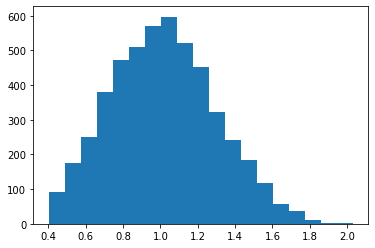

1 mean,std: (tensor(6.4864), tensor(21.4300))


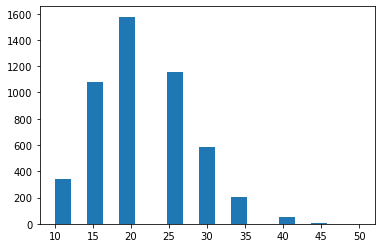

2 mean,std: (tensor(0.6674), tensor(1.9445))


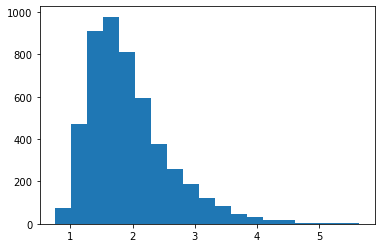

3 mean,std: (tensor(0.0989), tensor(0.8000))


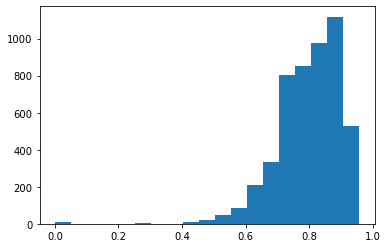

In [7]:
for ll in range(4):
    print(ll, 'mean,std:', torch.std_mean(labels4[:, ll]))
    lv = labels4[:, ll].numpy()
    num_bins = 20 # <-- Change here - Specify total number of bins for histogram
    plt.hist(lv.ravel(), bins=np.linspace(np.min(lv), np.max(lv), num=num_bins)) #<-- Change here.  Note the use of ravel.
    plt.show()